## 集成算法

### 使用sklearn实现随机森林分类器   

参数 含义

n_estimators 基评估器的数量。这个参数对随机森林模型的精确性影响是单调的，n_estimators越大，模型的效果往往越好。但是相应的，任何模型都有决策边界，n_estimators达到一定的程度之后，随机森林的精确性往往不在上升或开始波动，n_estimators越大，需要的计算量和内存也越大，训练的时间也会越来越长。对于这个参数，我们是渴望在训练难度和模型效果之间取得平衡。
 
criterion 不纯度的衡量指标，有基尼系数和信息熵两种选择

max_depth 树的最大深度，超过最大深度的树枝都会被剪掉

min_samples_leaf 一个节点在分枝后的每个子节点都必须包含至少min_samples_leaf个训练样本，否则分枝就不会发生

min_samples_split 一个节点必须要包含至少min_samples_split个训练样本，这个节点才允许被分枝，否则分枝就不会发生

max_features限制分枝时考虑的特征个数，超过限制个数的特征都会被舍弃，默认值为总特征个数开平方取整

min_impurity_decrease 限制信息增益的大小，信息增益小于设定数值的分枝不会发生

 #### n_estimators

In [3]:
#导入所需包
import matplotlib.pyplot as plt
#显示在单元格里面
%matplotlib inline  
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine

In [4]:
#导入数据集
wine = load_wine()
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [5]:
wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [6]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [7]:
#复习sklearn建模基本流程

#切分训练集和测试集
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(wine.data,wine.target,test_size=0.3)

In [8]:
#建立模型
clf = DecisionTreeClassifier(random_state=0)  #实例化
rfc = RandomForestClassifier(random_state=0)  #实例化
clf = clf.fit(Xtrain,Ytrain)
rfc = rfc.fit(Xtrain,Ytrain)

#查看模型效果
score_c = clf.score(Xtest,Ytest)
score_r = rfc.score(Xtest,Ytest)

#打印最后结果
print("Single Tree:",score_c)
print("Random Forest:",score_r)

Single Tree: 0.9444444444444444
Random Forest: 0.9629629629629629


D:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


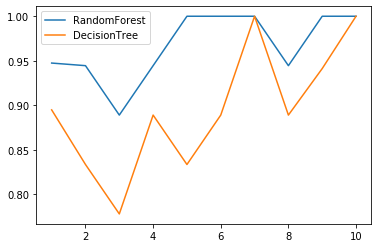

In [9]:
#画出随机森林和决策树在一组交叉验证下的效果对比

from sklearn.model_selection import cross_val_score 
import matplotlib.pyplot as plt

rfc = RandomForestClassifier(n_estimators=25)
rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10)

clf = DecisionTreeClassifier()
clf_s = cross_val_score(clf,wine.data,wine.target,cv=10)

plt.plot(range(1,11),rfc_s,label = "RandomForest")
plt.plot(range(1,11),clf_s,label = "DecisionTree")
plt.legend()
plt.show()

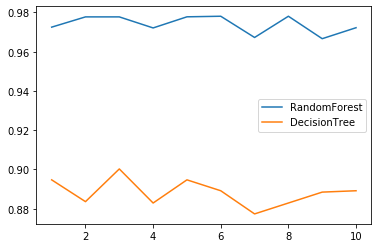

In [11]:
#画出随机森林和决策树在十组交叉验证下的效果对比

rfc_l = []
clf_l = []

for i in range(10):
    
   # 随机森林
    rfc = RandomForestClassifier(n_estimators=25)
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    rfc_l.append(rfc_s)
    
    # 决策树
    clf = DecisionTreeClassifier()
    clf_s = cross_val_score(clf,wine.data,wine.target,cv=10).mean()
    clf_l.append(clf_s)

#绘制结果曲线
plt.plot(range(1,11),rfc_l,label = "RandomForest")
plt.plot(range(1,11),clf_l,label = "DecisionTree")
plt.legend()
plt.show()

0.9888888888888889 23


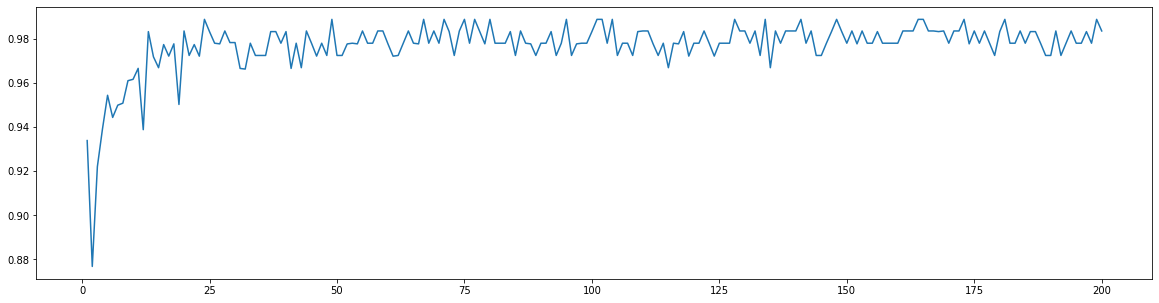

In [12]:
#n_estimators的学习曲线
#======【TIME WARNING: 6mins 30 seconds】==========#

superpa = []
for i in range(200):
    rfc = RandomForestClassifier(n_estimators=i+1,n_jobs=-1)
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    superpa.append(rfc_s)
    
#打印出最优score的值及其索引    
print(max(superpa),superpa.index(max(superpa)))

plt.figure(figsize=[20,5])
plt.plot(range(1,201),superpa)
plt.show()

#### random_state

假设一棵树判断错误的可能性为0.2(ε)，那13棵树以上都判断错误的可能性是：   
$$e_{random\_forest} = \sum_{i=13}^{25}C_{25}^{i}\varepsilon^{i}(1-\varepsilon)^{25-i} = 0.000369$$

In [13]:
#用代码实现上述公式
import numpy as np
from scipy.special import comb

np.array([comb(25,i)*(0.2**i)*((1-0.2)**(25-i)) for i in range(13,26)]).sum()

0.00036904803455582827

In [14]:
#随机森林中的random_state控制的是生成森林的模式
rfc = RandomForestClassifier(n_estimators=20,random_state=2)
rfc = rfc.fit(Xtrain, Ytrain)

In [17]:
rfc.estimators_

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                        max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=1872583848, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                        max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=794921487, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                        max_features='auto', max_leaf_nodes=None,
                  

In [15]:
#随机森林的重要属性之一：estimators，查看森林中树的状况
rfc.estimators_[0].random_state

1872583848

In [18]:
#打印出森林中所有树的随机模式
for i in range(len(rfc.estimators_)):
    print(rfc.estimators_[i].random_state)

1872583848
794921487
111352301
1853453896
213298710
1922988331
1869695442
2081981515
1805465960
1376693511
1418777250
663257521
878959199
854108747
512264917
515183663
1287007039
2083814687
1146014426
570104212


#### bootstrap & oob_score（用袋外数据测试模型  ）
 

In [19]:
#无需划分训练集和测试集
rfc = RandomForestClassifier(n_estimators=25,oob_score=True)
rfc = rfc.fit(wine.data,wine.target)

In [20]:
#重要属性oob_score_
rfc.oob_score_

0.9831460674157303

In [21]:
#尝试一下这些属性和接口
rfc = RandomForestClassifier(n_estimators=25)
rfc = rfc.fit(Xtrain, Ytrain)
rfc.score(Xtest,Ytest)

0.9814814814814815

In [22]:
rfc.feature_importances_

array([0.16624382, 0.03388251, 0.01131084, 0.01434257, 0.03258469,
       0.07697294, 0.14458075, 0.01472259, 0.02597534, 0.16212768,
       0.0979238 , 0.07207935, 0.14725312])

In [23]:
rfc.apply(Xtest)

array([[ 1, 11,  5, ...,  2,  4,  9],
       [ 6,  4, 15, ...,  6, 19,  4],
       [ 1,  5,  5, ...,  2,  4,  9],
       ...,
       [ 6,  4,  8, ...,  6, 12,  4],
       [17, 16, 13, ..., 15, 22, 12],
       [23, 16,  5, ..., 15, 22, 12]], dtype=int64)

In [24]:
rfc.predict(Xtest)

array([1, 2, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 2, 2, 2, 0, 1, 1, 0, 2, 2,
       0, 2, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 2,
       0, 2, 1, 2, 0, 0, 2, 2, 0, 0])

In [36]:
rfc.predict_proba(Xtest)

array([[0.84, 0.16, 0.  ],
       [0.04, 0.96, 0.  ],
       [0.  , 0.4 , 0.6 ],
       [0.04, 0.88, 0.08],
       [0.  , 0.36, 0.64],
       [0.  , 0.  , 1.  ],
       [0.8 , 0.04, 0.16],
       [0.  , 0.24, 0.76],
       [0.04, 0.04, 0.92],
       [0.  , 1.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.12, 0.08, 0.8 ],
       [0.  , 0.08, 0.92],
       [0.92, 0.04, 0.04],
       [0.96, 0.04, 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.04, 0.96],
       [0.12, 0.  , 0.88],
       [0.  , 0.16, 0.84],
       [0.  , 1.  , 0.  ],
       [0.  , 0.04, 0.96],
       [1.  , 0.  , 0.  ],
       [0.28, 0.68, 0.04],
       [0.96, 0.04, 0.  ],
       [0.  , 0.96, 0.04],
       [0.96, 0.04, 0.  ],
       [0.96, 0.04, 0.  ],
       [0.96, 0.04, 0.  ],
       [0.  , 1.  , 0.  ],
       [0.88, 0.08, 0.04],
       [0.  , 0.  , 1.  ],
       [0.  , 0.04, 0.96],
       [0.  , 0.12, 0.88],
       [0.  , 0.6 , 0.4 ],
       [0.12, 0.6 , 0.28],
       [0.  , 0.  , 1.  ],
       [0.8 , 0.16, 0.04],
 

#### 检验基分类器

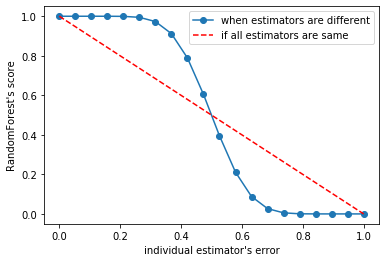

In [27]:
#基分类器的判断准确率至少要超过50%

x = np.linspace(0,1,20)
y = []
for epsilon in np.linspace(0,1,20):
    E = np.array([comb(25,i)*(epsilon**i)*((1-epsilon)**(25-i)) 
                  for i in range(13,26)]).sum()    
    score=1-E
    y.append(score)
plt.plot(x,y,"o-",label="when estimators are different")
plt.plot(x,1-x,"--",color="red",label="if all estimators are same")
plt.xlabel("individual estimator's error")
plt.ylabel("RandomForest's score")
plt.legend()
plt.show()

### 2. 随机森林回归器

<img src='pictures/随机森林回归器.png' width=400>

#### 建立随机森林回归

In [ ]:
# 随机森林回归用法
# 回归树的接口score返回的是R平方，并不是MSE。

from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import sklearn

In [31]:
boston = load_boston()
regressor = RandomForestRegressor(n_estimators=100,random_state=0)

虽然均方误差永远为正，但是sklearn当中使用均方误差作为评判标准时，却是计算”负均方误差“（neg_mean_squared_error）。这是因为sklearn在计算模型评估指标的时候，会考虑指标本身的性质，均方误差本身是一种误差，所以被sklearn划分为模型的一种损失(loss)，因此在sklearn当中，都以负数表示。真正的均方误差MSE的数值，其实就是neg_mean_squared_error去掉负号的数字。

In [32]:
cross_val_score(regressor, boston.data, boston.target, cv=10
               ,scoring = "neg_mean_squared_error")

array([-10.72900447,  -5.36049859,  -4.74614178, -20.84946337,
       -12.23497347, -17.99274635,  -6.8952756 , -93.78884428,
       -29.80411702, -15.25776814])

In [34]:
cross_val_score(regressor, boston.data, boston.target, cv=10)

array([ 0.69241975,  0.80040014,  0.32339635,  0.7874838 ,  0.82642804,
        0.76089612,  0.56903709,  0.37099534, -0.58136724,  0.19112288])

返回十次交叉验证的结果，注意在这里，如果不填写scoring = "neg_mean_squared_error"，交叉验证默认的模型衡量指标是R平方，因此交叉验证的结果可能有正也可能有负。而如果写上scoring，则衡量标准是负MSE，交叉验证的结果只可能为负。

In [30]:
#查看所有可以用的评估指标
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

#### 随机森林回归填补缺失值

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [37]:
dataset = load_boston()

dataset.data.shape
#总共506*13=6578个数据

X_full, y_full = dataset.data, dataset.target
n_samples = X_full.shape[0]
n_features = X_full.shape[1]

##### 创建缺失数据集

In [38]:
#假设缺失值比例为50%
rng = np.random.RandomState(0)
missing_rate = 0.5
n_missing_samples = int(np.floor(n_samples * n_features * missing_rate))

missing_features = rng.randint(0,n_features,n_missing_samples)
missing_samples = rng.randint(0,n_samples,n_missing_samples)

X_missing = X_full.copy()
y_missing = y_full.copy()

X_missing[missing_samples,missing_features] = np.nan
X_missing = pd.DataFrame(X_missing)

##### 使用均值进行填补

In [39]:

from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
X_missing_mean = imp_mean.fit_transform(X_missing)

##### 使用0进行填补

In [40]:

imp_0 = SimpleImputer(missing_values=np.nan, strategy="constant",fill_value=0)
X_missing_0 = imp_0.fit_transform(X_missing)

##### 随机森林回归填补缺失值

In [42]:
X_missing_reg = X_missing.copy()
sortindex = np.argsort(X_missing_reg.isnull().sum(axis=0)).values

for i in sortindex:
    #构建我们的新特征矩阵和新标签
    df = X_missing_reg
    fillc = df.iloc[:,i]
    df = pd.concat([df.iloc[:,df.columns != i],pd.DataFrame(y_full)],axis=1)
    
    #在新特征矩阵中，对含有缺失值的列，进行0的填补
    df_0 =SimpleImputer(missing_values=np.nan,
                        strategy='constant',fill_value=0).fit_transform(df)
    
    #找出我们的训练集和测试集
    Ytrain = fillc[fillc.notnull()]
    Ytest = fillc[fillc.isnull()]
    Xtrain = df_0[Ytrain.index,:]
    Xtest = df_0[Ytest.index,:]
    
    #用随机森林回归来填补缺失值
    rfc = RandomForestRegressor(n_estimators=100)
    rfc = rfc.fit(Xtrain, Ytrain)
    Ypredict = rfc.predict(Xtest)
    
    #将填补好的特征返回到我们的原始的特征矩阵中
    X_missing_reg.loc[X_missing_reg.iloc[:,i].isnull(),i] = Ypredict

##### 对填补好的数据进行建模

In [43]:
X = [X_full,X_missing_mean,X_missing_0,X_missing_reg]

mse = []
std = []
for x in X:
    estimator = RandomForestRegressor(random_state=0, n_estimators=100)
    scores = cross_val_score(estimator,x,y_full,scoring='neg_mean_squared_error', cv=5).mean()
    mse.append(scores * -1)

##### 绘制可视化图形

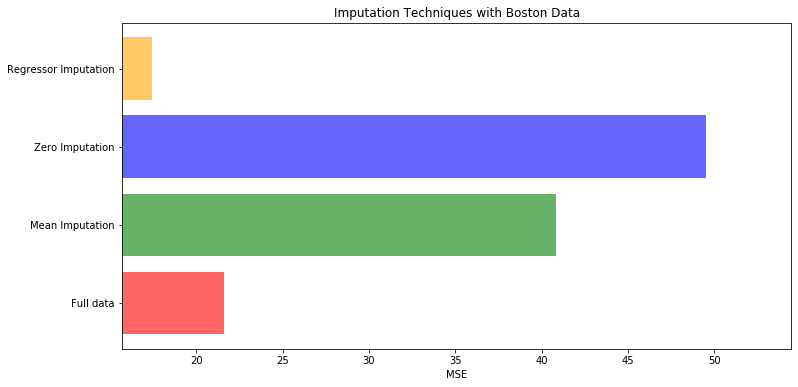

In [44]:
x_labels = ['Full data',
            'Mean Imputation',
            'Zero Imputation',          
            'Regressor Imputation']
colors = ['r', 'g', 'b', 'orange']

plt.figure(figsize=(12, 6))
ax = plt.subplot(1,1,1)
for i in np.arange(len(mse)):
    ax.barh(i, mse[i],color=colors[i], alpha=0.6, align='center')
ax.set_title('Imputation Techniques with Boston Data')
ax.set_xlim(left=np.min(mse) * 0.9,
             right=np.max(mse) * 1.1)
ax.set_yticks(np.arange(len(mse)))
ax.set_xlabel('MSE')
ax.set_yticklabels(x_labels)
plt.show()

### 3. AdaBoost分类器

<img src='pictures/AdaBoost分类器.png' width=400>

In [50]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles

In [51]:
#生成数据集

# 生成2维正态分布，生成的数据按分位数分为两类，500个样本,2个样本特征，协方差系数为2
X1, y1 = make_gaussian_quantiles(cov=2.0,n_samples=500, n_features=2,n_classes=2, random_state=1)

# 生成2维正态分布，生成的数据按分位数分为两类，400个样本,2个样本特征均值都为3，协方差系数为2
X2, y2 = make_gaussian_quantiles(mean=(3, 3), cov=1.5,n_samples=400, n_features=2, n_classes=2, random_state=1)

#将两组数据合成一组数据
X = np.concatenate((X1, X2))
y = np.concatenate((y1, - y2 + 1))

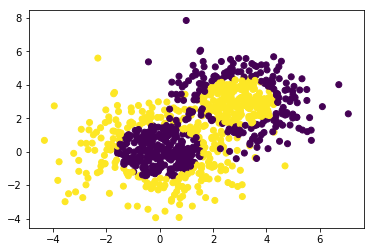

In [59]:
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y);

In [ ]:
# learning_rate这里的学习率只是指的每个树的权重的衰减速度
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2, 
                                                min_samples_split=20,
                                                min_samples_leaf=5),
                                                lgorithm="SAMME",
                                                n_estimators=200,
                                                learning_rate=0.8)

In [60]:
bdt.fit(X, y)

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.8, n_estimators=200, random_state=None)

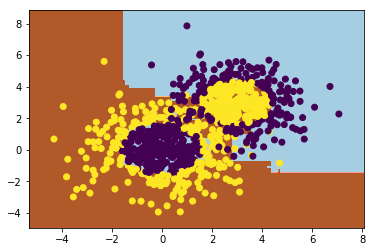

In [61]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = bdt.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y)
plt.show()

In [64]:
print("Score:" ,bdt.score(X,y))

Score: 0.9133333333333333


In [65]:
#将最大弱分离器个数从200增加到300
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2, min_samples_split=20
                                                , min_samples_leaf=5),algorithm="SAMME"
                                                , n_estimators=300, learning_rate=0.8)
bdt.fit(X, y)
print("Score:" ,bdt.score(X,y))

Score: 0.9622222222222222


In [66]:
#将步长从0.8减少到0.5
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2, min_samples_split=20
                                                , min_samples_leaf=5),algorithm="SAMME"
                                                ,n_estimators=300, learning_rate=0.5)
bdt.fit(X, y)
print("Score:" ,bdt.score(X,y))

Score: 0.8944444444444445


In [68]:
#弱分类器个数为700，步长为0.7
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2, min_samples_split=20
                                                , min_samples_leaf=5),algorithm="SAMME"
                                                ,n_estimators=600, learning_rate=0.7)
bdt.fit(X, y)
print("Score:", bdt.score(X,y))

Score: 0.9611111111111111


### 4. AdaBoost回归器

In [45]:
#导入所需的模块和包
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

In [46]:
#创造数据集
rng = np.random.RandomState(1)          
X = np.linspace(0, 6, 100).reshape(-1,1)  
y = np.sin(X).ravel() + np.sin(6 * X).ravel() + rng.normal(0, 0.1, X.shape[0])

In [47]:
#训练回归模型
regr_1 = DecisionTreeRegressor(max_depth=4)

regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=300, random_state=rng)

regr_1.fit(X, y)
regr_2.fit(X, y)

#预测结果
y_1 = regr_1.predict(X)
y_2 = regr_2.predict(X)

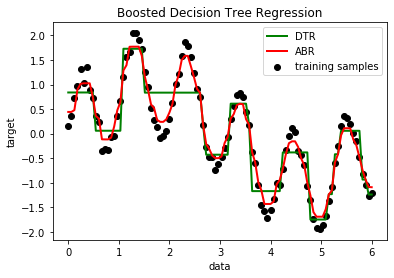

In [48]:
#绘制可视化图形
plt.figure()
plt.scatter(X, y, c="k", label="training samples")
plt.plot(X, y_1, c="g", label="DTR", linewidth=2)
plt.plot(X, y_2, c="r", label="ABR", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Boosted Decision Tree Regression")
plt.legend()
plt.show()